# Central Limit Theorem (CLT) !

Welcome! In this lab, we will be exploring the Central Limit Theorem (CLT)! Although this concept was first developed by Abraham de Moivre in 1733, it wasn’t formally named until 1930, when noted Hungarian mathematician George Polya officially dubbed it the Central Limit Theorem.

## Review: What is the Central Limit Theorem?
Basically, the Central Limit Theorem says:  

If we repeatedly take independent random samples of size n from any population, then when n is large, the distribution of the sample means will approach a normal distribution.

Wow! This works for any population, even non-normal populations.  The CLT is a very useful theorem that is the foundation for many data science procedures. We'll see a lot of these procedures in the upcoming weeks in Data Science DISCOVERY!

Today, we will be working with a "song_data" dataset that has around 19,000 songs which have multiple attributes. This lab will help demonstrate how the Central Limit Theorem works! Below are the 15 attributes of the "song" dataset. 

The Attributes:

- `song_name`: contains the name of the song
- `song_popularity`: how popular a song is
- `song_duration_ms`: length of the song
- `acousticness`: the higher the value, the more acoustic the song is
- `danceability`: the higher the value, the easier it is to dance to this song
- `energy`: the energy of a song, the higher the value, the more energetic
- `instrumentalness`: the higher the value, the less vocals there are
- `key`: key the track is in
- `liveness`: the higher the value, the more of an audience presence there is
- `loudness`: the higher the value, the louder the song (in dB)
- `audiomode`: represents the modality of the track: major is represented by 1 and minor is represented by 0
- `speechiness`: the higher the value, the more presence of spoken words
- `tempo`: the overall estimated tempo of the song
- `time_signature`: an estimated overall time signature of a track
- `audio_valence`: the higher the value, the more positive it is

# 0. Import the Dataset

In the same folder as this notebook find the dataset `song_data.csv` that is provided. You know what to do to import the libraries and read the data! :)

In [4]:
import pandas as pd
import random
#from scipy.stats import norm

In [5]:
df = pd.read_csv('song_data.csv')
df


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


# 1. Puzzle 1 

### 1.1 Find Descriptive Statistics
Let's do some basic EDA to start. Find the mean, median, standard deviation, first quartile, and third quartile for each of the attributes. Quantiles are the same thing as quartiles that we talked about in class. *You will need some of these values later so make sure to store them as variables!*

In [6]:
df_mean = df.mean()
df_median = df.median()
df_sd = df.std()
df_quantile1st = df.quantile(0.25)
df_quantile3rd = df.quantile(0.75)



In [7]:
df_mean

song_popularity         52.991877
song_duration_ms    218211.587576
acousticness             0.258539
danceability             0.633348
energy                   0.644995
instrumentalness         0.078008
key                      5.289196
liveness                 0.179650
loudness                -7.447435
audio_mode               0.628139
speechiness              0.102099
tempo                  121.073154
time_signature           3.959119
audio_valence            0.527967
dtype: float64

In [8]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(round(df_mean[0],0) == 53), "The value is not correct!"
assert(round(df_median[0],0) == 56), "The value is not correct!"
assert(round(df_sd[0],0) == 22), "The value is not correct!"
assert(round(df_quantile1st[0],0) == 40), "The value is not correct!"
assert(round(df_quantile3rd[0],0) == 69), "The value is not correct!"

### 1.2 Histograms for the Dataset

Plot the histograms for each column and find the two columns whose histograms are closest to the normal distribution. Calcuate the mean and standard deviation for these two columns. 

- If needed: In `df.hist`, use `figsize=(50, 30)` to make your figure bigger.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bd45828>,
      dtype=object)

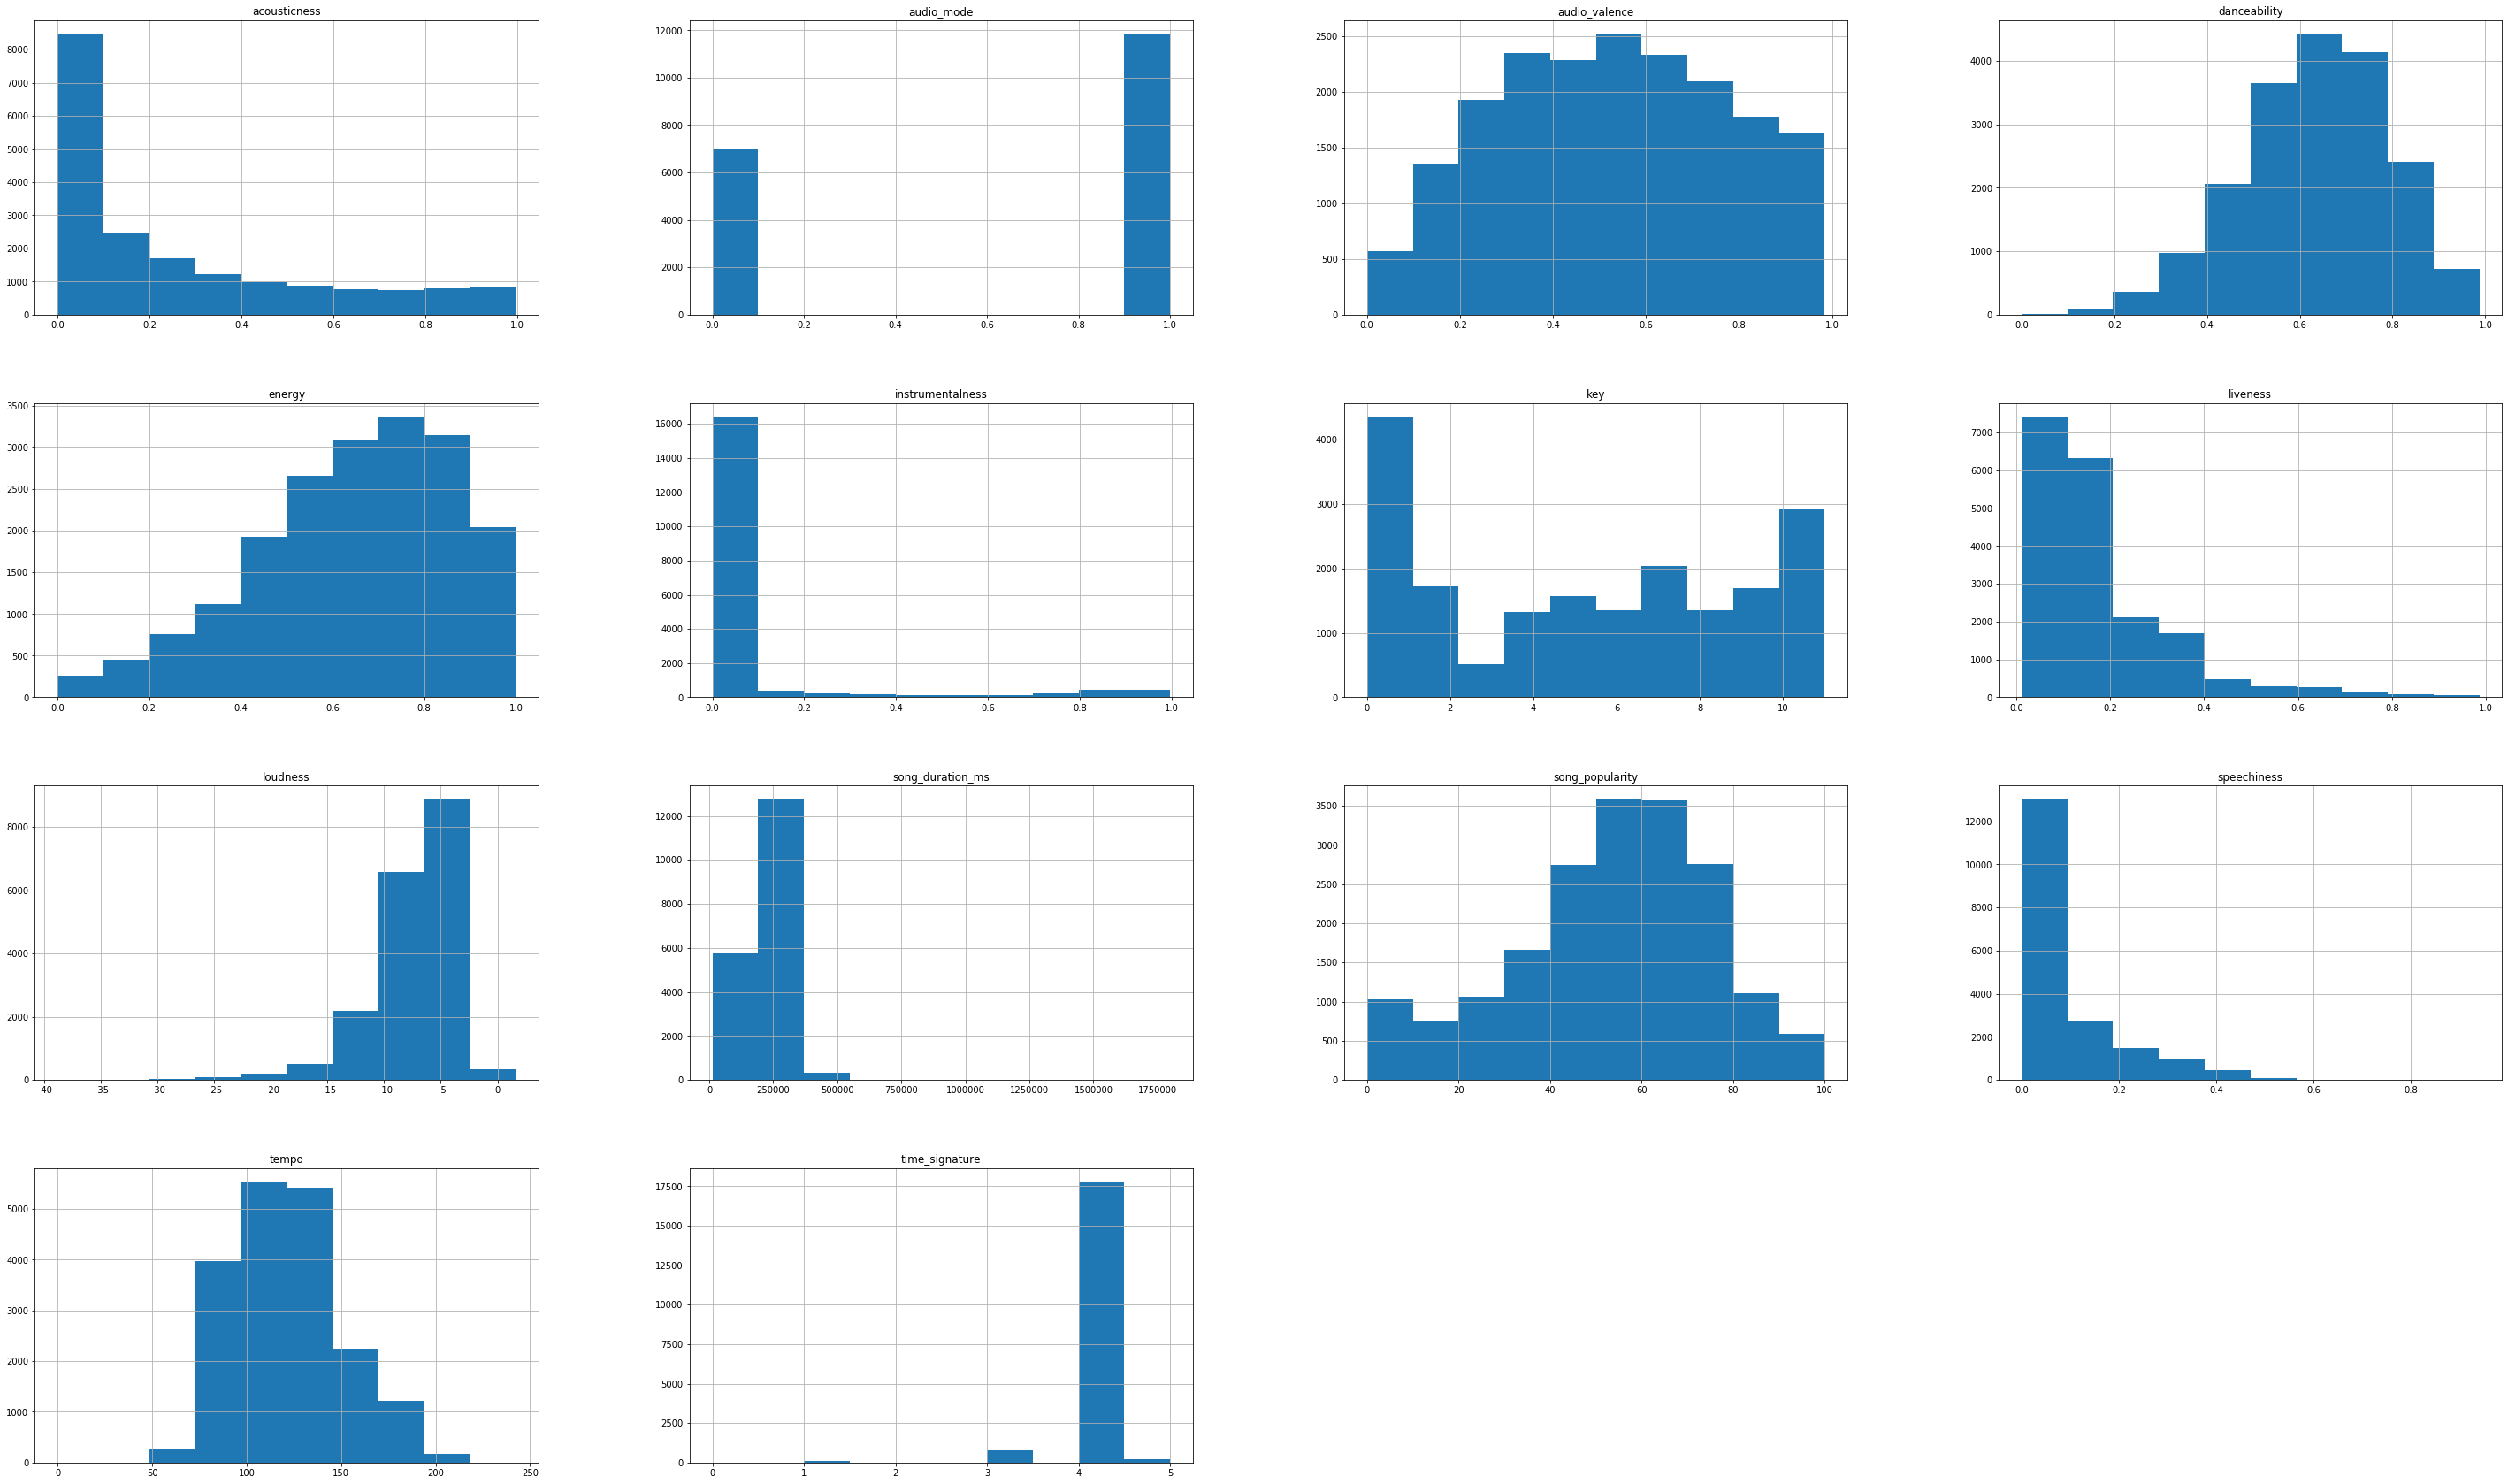

In [10]:
df.hist(figsize=(50,30))
#
#

In [11]:
var1_mean = df['danceability'].mean()
var1_sd = df['danceability'].std()
var2_mean = df['song_popularity'].mean()
var2_sd = df['song_popularity'].std()




In [12]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(round(var1_mean,1) == 0.6), "The value is not correct!"
assert(round(var1_sd,1) == 0.2), "The value is not correct!"
assert(round(var2_mean,1) == 53), "The value is not correct!"
assert(round(var2_sd,1) == 21.9), "The value is not correct!"

# 2. Puzzle 2

### 2.1 Simulation #1
Now, we will see the beauty of the Central Limit Theorem.  

Define a funciton called `simulate_average` that will simulate playing `n` random songs and return the average value of these `n` songs for each column. For example, the column may be `'danceability'` and your function should return the average `'danceability'` for the `n` songs.

In [13]:
### simulate_average ###
#def simulate_average(n):
#    data= []
#    for i in range(n):
#        d= df['song_name'].random.choice()
#        c= d.mean()
#        data.append(c)



In [14]:
# variables are never in quotes
def simulate_average(n,column):
    sample= df.sample(n)
    avg= sample.mean()
    return avg[column]


In [15]:
simulate_average(5, 'danceability')

0.5883999999999999

### 2.1.1 Approximating The Normal Distribution

Plot the histogram for the column `loudness`. Then using the `simulate_average` function we defined before, use the column `loudness` to run the simulation **100** times with `n = 1000`.  Store the results in a dataframe and plot the histogram to see the results.  Repeat this with the variable `danceability`.  Finally, repeat the process **10000** times for both variables and see the results.

In [17]:
data3= []
for i in range(100):
    loud2= simulate_average(1000, 'loudness')
    d3= {'loud2':loud2}
    data3.append(d3)
     
df_loudness_100= pd.DataFrame(data3)

In [18]:
df_loudness_100

,loud2
0,-7.448288
1,-7.432299
2,-7.371127
3,-7.295954
4,-7.388422
...,...
95,-7.593671
96,-7.460928
97,-7.467019
98,-7.458915


In [19]:
data4= []
for i in range(100):
    dance2= simulate_average(1000, 'danceability')
    d4= {'dance2':dance2}
    data4.append(d4)
     
df_danceability_100= pd.DataFrame(data4)

In [20]:
data1= []
for i in range(10000):
    loud= simulate_average(1000, 'loudness')
    d= {'loud':loud}
    data1.append(d)
     
df_loudness_10000= pd.DataFrame(data1)

In [21]:
data2= []
for i in range(10000):
    dance= simulate_average(1000, 'danceability')
    d2= {'dance':dance}
    data2.append(d2)
    
df_danceability_10000= pd.DataFrame(data2)

In [26]:
df_loudness_100

#
#

,loud2
0,-7.448288
1,-7.432299
2,-7.371127
3,-7.295954
4,-7.388422
...,...
95,-7.593671
96,-7.460928
97,-7.467019
98,-7.458915


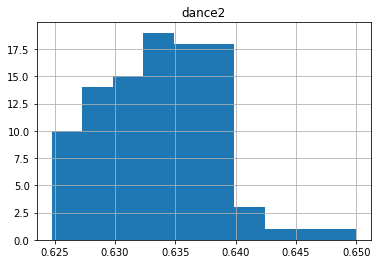

In [27]:
dance_hist= df_danceability_100.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac2ff60>]],
      dtype=object)

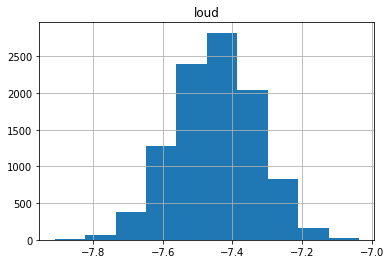

In [28]:
df_loudness_10000.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ae056d8>]],
      dtype=object)

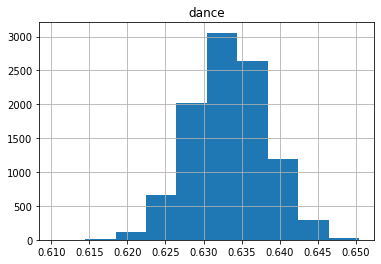

In [29]:
df_danceability_10000.hist()

In [30]:
# save dataframes in here
#df_danceability_100 = simulate_average(100, 'danceability')
#df_loudness_100 = simulate_average(100, 'loudness')
#df_danceability_10000 = simulate_average(10000, 'danceability')
#df_loudness_10000 = simulate_average(10000, 'loudness')



In [31]:
## == TEST CASES for Puzzle 2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( (0.62 <= df_danceability_100.mean()).bool() & (df_danceability_100.mean() <= 0.68).bool() ), "The simulation is not correct!"
assert( (-7.6 <= df_loudness_100.mean()).bool() & (df_loudness_100.mean() <= -7.3).bool() ), "The simulation is not correct!"
assert( (0.62 <= df_danceability_10000.mean()).bool() & (df_danceability_10000.mean() <= 0.68).bool() ), "The simulation is not correct!"
assert( (-7.6 <= df_loudness_10000.mean()).bool() & (df_loudness_10000.mean() <= -7.3).bool() ), "The simulation is not correct!"

### 2.1 Simulation #2
In simulation #1, we saw the CLT in action using the song dataset. In this simulation, we are going to see the CLT again, but for rolling dice. Create **50** simulations of **10** die rolls.  For each simulation, find the average of the dice rolls and store the value. Then create a histogram of your results. Repeat, but using **100** simulations. Finally, repeat again with **1000** simulations.

In [53]:
# make a function that simulates the average of n die rolls
def dice_game(n):
    data=[]
    total= 0
    for i in range(n):
        dice= random.randint(1,6)
        total= total + dice
    average= total/(n) 
    return average
        

In [54]:
dice_game(n=50)

3.32

In [55]:
data50= []
for i in range(50):
    dice_50= dice_game(n=10)
    d50= {'dice_50':dice_50}
    data50.append(d50)
     
df_dice_50= pd.DataFrame(data50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120fd9f60>]],
      dtype=object)

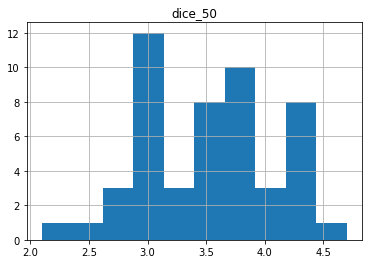

In [56]:
df_dice_50.hist()

In [57]:
data100= []
for i in range(100):
    dice_100= dice_game(n=10)
    d100= {'dice_100':dice_100}
    data100.append(d100)
     
df_dice_100= pd.DataFrame(data100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1210fa320>]],
      dtype=object)

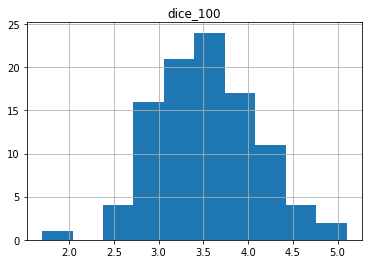

In [58]:
df_dice_100.hist()

In [59]:
data1000= []
for i in range(1000):
    dice_1000= dice_game(n=10)
    d1000= {'dice_1000':dice_1000}
    data1000.append(d1000)
     
df_dice_1000= pd.DataFrame(data1000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121103358>]],
      dtype=object)

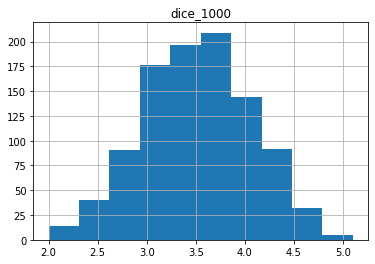

In [60]:
df_dice_1000.hist()

In [61]:
## == TEST CASES for Puzzle 3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( (3.3 <= df_dice_1000.mean()).bool() & (df_dice_1000.mean() <= 3.6).bool() ), "The simulation is not correct!"

## Submit Your Work!

You're almost done -- congratulations!

You need to do two more things:

1. Save your work.  To do this, create a **notebook checkpoint** by using the menu within the notebook to go **File -> Save and Checkpoint**

2. Choose `File` and then `Close and Halt` from this notebook.

3. Choose `Quit` on the main notebook webpage.

4. Return to your command line and follow the directions on the Data Science Discovery page on how to use git to turn this notebook into the course!